<a href="https://colab.research.google.com/github/Rocky12312/Sentiment-analysis/blob/master/Sentiment_analysis_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My\ Drive/Pn2x

/content/drive/My Drive/Pn2x


In [3]:
#Picking up the latest version of tensorflow and uninstalling tensorboard(also making sure that no other tensoflow plugin running)
try:
  !pip uninstall tb-nightly tensorboardx tensorboard
  !pip install tf-nightly
except Exception:
  pass

Uninstalling tensorboard-2.2.2:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.6/dist-packages/tensorboard-2.2.2.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorboard/*
Proceed (y/n)? y
  Successfully uninstalled tensorboard-2.2.2
     |████████████████████████████████| 526.2MB 31kB/s 
     |████████████████████████████████| 460kB 40.1MB/s 
     |████████████████████████████████| 3.0MB 40.4MB/s 


In [0]:
from __future__ import absolute_import,division,print_function,unicode_literals
import os
import tensorflow as tf
import datetime
import tensorflow_datasets as tfds
%load_ext tensorboard

Listing all the tensorflow plugins(for checking whether any tensorflow plugin is running or not)

In [6]:
import pkg_resources
for entry_point in pkg_resources.iter_entry_points("tensorboard_plugins"):
  print(entry_point.dist)

tensorboard 2.2.2
tensorboard-plugin-wit 1.6.0.post3


So as we can see here two tensorboards so removing colab directory of tensorboard

In [0]:
rm -r /usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info
#If we dont remove this tensorboard will not get loaded

In [8]:
tf.__version__

'2.3.0-dev20200605'

Loading the dataset from tensorflow datasets along with the info of dataset

In [10]:
data,info = tfds.load("amazon_us_reviews/Mobile_Electronics_v1_00",with_info = True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incompleteJGCPSC/amazon_us_reviews-train.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


Displaying the information of the datasets

In [11]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [12]:
#Assigning the training data to train_data variable
train_data = data["train"]
#The size of training data
print(len(train_data))

104975


Basically from above we can see that the data contain a lot of features but what we are interested in is the review and the rating(review body and star rating)

Now shuffling our data so that the data is random.

In [0]:
train_data = train_data.shuffle(buffer_size = 30000,reshuffle_each_iteration = False)

In [18]:
for data in train_data.take(5):
  print(data)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'19027009'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B008R68DFS'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'423148551'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'Patazon Black Extension Dock Extender 30pin Adapter for iPod iPhone 4 4S'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b'works great needed it to add to dock si it work work with my otter box case fits very well'>, 'review_date': <tf.Tensor: shape=(), dtype=string, numpy=b'2013-04-01'>, 'review_headline': <tf.Tensor: shape=(), dtype=string, numpy=b'great'>, 'review_id': <tf.Tensor: shape=(), dtype=string, numpy=b'R2OH33D5WUZH6'>, 'star_rating': <tf.Tensor: shape=(), dtype=int32, 

As we can see that our output is tensor and each feature from the data is also tensor

In [20]:
for data in train_data.take(5):
  data_l = data["data"]
  #What we are doing is internally coverting the tensoflow object to numpy object using .numpy()
  print(data_l.get("review_body").numpy())
  print(data_l.get("star_rating"))
  #Where star_rating > 3 print 1 there and zero at other place
  print(tf.where(data_l.get("star_rating")>3,1,0).numpy())

b'works great needed it to add to dock si it work work with my otter box case fits very well'
tf.Tensor(5, shape=(), dtype=int32)
1
b'Sucked key metal too thick had to physically sand down the metal and then cut the key. And to top it the transponder for the Lexus rx 330 is not in the right position and will not start the car. But what do you want for $10. Chia rippoff'
tf.Tensor(1, shape=(), dtype=int32)
0
b'love this skin...bout the purple one for my girlfriend and I got the blaze orange skin. They work great and in my case gives me the added width to fit my kindle into my pelican case a bit tighter. Great buy'
tf.Tensor(5, shape=(), dtype=int32)
1
b'Beautiful! Arrived on time & just what I expected.'
tf.Tensor(5, shape=(), dtype=int32)
1
b"I ordered this shell case because the case I have right now is cracked.  Upon receipt of this item, I immediately regretted ordering it.  The plastic covering over the panic button was falling off (and this is right out of the package!), the gray 

What we gonna do is make a review as positive if star_rating > 3 and negative otherwise

Now we will preprocess our data.

In [0]:
#First we will tokenize our data and will build our vocabulary
tokenizer = tfds.features.text.Tokenizer()
vocabulary = set()
for _,data in train_data.enumerate():
  data = data["data"]
  tokens = tokenizer.tokenize(data.get("review_body").numpy())
  vocabulary.update(tokens)

In [24]:
print(len(vocabulary))

73738


We have 73738 unique tokens in our data.

Now encoding the tokens in vocabulary with numbers.

In [0]:
encoder = tfds.features.text.TokenTextEncoder(vocabulary)

Having a look at original text and encoded values

In [27]:
for data in train_data.take(5):
  data = data["data"]
  print(data.get("review_body").numpy())
  encoded_values = encoder.encode(data.get("review_body").numpy())
  print(encoded_values)

b'works great needed it to add to dock si it work work with my otter box case fits very well'
[54043, 9292, 17578, 53836, 32093, 30953, 32093, 28928, 31047, 53836, 16366, 16366, 24033, 51357, 26174, 43762, 64921, 62601, 67960, 4515]
b'Sucked key metal too thick had to physically sand down the metal and then cut the key. And to top it the transponder for the Lexus rx 330 is not in the right position and will not start the car. But what do you want for $10. Chia rippoff'
[589, 71355, 55483, 9518, 5360, 39642, 32093, 68905, 28619, 69859, 6216, 55483, 26845, 26124, 58704, 6216, 71355, 3985, 32093, 26688, 53836, 6216, 70597, 40789, 6216, 63513, 67066, 3015, 53349, 50401, 60494, 6216, 8905, 65580, 26845, 71531, 50401, 23664, 6216, 13545, 58007, 49157, 66038, 9615, 17552, 40789, 42704, 20097, 47423]
b'love this skin...bout the purple one for my girlfriend and I got the blaze orange skin. They work great and in my case gives me the added width to fit my kindle into my pelican case a bit tighte

Now we have both our text and their encoded values.

In [31]:
for ix in encoded_values:
  print(ix," Corresponding word for the index ",encoder.decode([ix]))

36777  Corresponding word for the index  I
19990  Corresponding word for the index  ordered
12665  Corresponding word for the index  this
50108  Corresponding word for the index  shell
64921  Corresponding word for the index  case
26276  Corresponding word for the index  because
6216  Corresponding word for the index  the
64921  Corresponding word for the index  case
36777  Corresponding word for the index  I
27845  Corresponding word for the index  have
8905  Corresponding word for the index  right
70968  Corresponding word for the index  now
53349  Corresponding word for the index  is
52780  Corresponding word for the index  cracked
23692  Corresponding word for the index  Upon
10814  Corresponding word for the index  receipt
59089  Corresponding word for the index  of
12665  Corresponding word for the index  this
14260  Corresponding word for the index  item
36777  Corresponding word for the index  I
19119  Corresponding word for the index  immediately
7486  Corresponding word for t

In [0]:
def encode(text,label):
  encoded_text = encoder.encode(text.numpy())
  labels = tf.where(label>3,1,0)
  return encoded_text,labels

In [0]:
def encoded_mapper(data):
  text = data["data"].get("review_body")
  label = data["data"].get("star_rating")
  #py_function wraps a python function into a TensorFlow
  encoded_text,labels = tf.py_function(encode,inp = [text,label],Tout = (tf.int64,tf.int32))
  encoded_text.set_shape([None])
  labels.set_shape([])
  return encoded_text,labels

Now applying these functions to the input train_data

In [0]:
encoded_train_data = train_data.map(encoded_mapper)

In [49]:
for i,j in encoded_train_data.take(2):
  print(i)
  print(j)

tf.Tensor(
[54043  9292 17578 53836 32093 30953 32093 28928 31047 53836 16366 16366
 24033 51357 26174 43762 64921 62601 67960  4515], shape=(20,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[  589 71355 55483  9518  5360 39642 32093 68905 28619 69859  6216 55483
 26845 26124 58704  6216 71355  3985 32093 26688 53836  6216 70597 40789
  6216 63513 67066  3015 53349 50401 60494  6216  8905 65580 26845 71531
 50401 23664  6216 13545 58007 49157 66038  9615 17552 40789 42704 20097
 47423], shape=(49,), dtype=int64)
tf.Tensor(0, shape=(), dtype=int32)


Basically in few previous steps we took the whole train data and encoded it and assigned it to encoded_train_data.

Now what we gonna do is split our dataset into train and test data.

In [0]:
train_data_p = encoded_train_data.skip(8000).shuffle(30000)
train_data_p = train_data_p.padded_batch(128)

In [0]:
test_data_p = encoded_train_data.take(8000)
test_data_p = test_data_p.padded_batch(128)

The data will be padded in such a way that for every batch the pad size will be the length of longest text and all other text will be padded accordingly.

In [0]:
#Adding zero to vocabulary
vocab_size = len(vocabulary)
vocab_size = vocab_size + 1

Looking at the target distribution of data.

In [57]:
a,b = next(iter(test_data_p))
a[0],b[0]

(<tf.Tensor: shape=(519,), dtype=int64, numpy=
 array([54043,  9292, 17578, 53836, 32093, 30953, 32093, 28928, 31047,
        53836, 16366, 16366, 24033, 51357, 26174, 43762, 64921, 62601,
        67960,  4515,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,  

This is what our data look like.

As it looks like that the number of zeros are preety much so we can also pad our data to fix length but let give it a try and if it does not help much in generalising then we will pad the data to a fixed size.

Now next this is we will build the model.

In [0]:
model = tf.keras.Sequential()
#Here we are not using any pretrained embedding like glove etc
model.add(tf.keras.layers.Embedding(vocab_size,128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences = True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(64,activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

In [0]:
model.summary()

Removing all the tmp logs

In [61]:
!rm -r /tmp/logs

rm: cannot remove '/tmp/logs': No such file or directory


In [0]:
#Creating a log directory
logdir = os.path.join("/tmp/logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq = 1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = "/tmp/model.hdf5",verbose = 1,save_best_only = True)
#After setting the callbacks and modelcheckpoint we will compile the model
#We are using logits to validate the model
model.compile(optimizer = "adam",loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),metrics = ["accuracy"])

In [67]:
history = model.fit(train_data_p,epochs = 4,validation_data = test_data_p,callbacks = [tensorboard_callback,checkpointer])

Epoch 1/4
  1/758 [..............................] - ETA: 2:25 - loss: 0.6951 - accuracy: 0.2812WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


  2/758 [..............................] - ETA: 7:53 - loss: 0.6895 - accuracy: 0.2812WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.3843s vs `on_train_batch_end` time: 0.6755s). Check your callbacks.


758/758 [==============================] - ETA: 0s - loss: 0.3439 - accuracy: 0.8435
Epoch 00001: val_loss improved from inf to 0.29598, saving model to /tmp/model.hdf5
758/758 [==============================] - 651s 859ms/step - loss: 0.3439 - accuracy: 0.8435 - val_loss: 0.2960 - val_accuracy: 0.8710
Epoch 2/4
758/758 [==============================] - ETA: 0s - loss: 0.2358 - accuracy: 0.9047
Epoch 00002: val_loss did not improve from 0.29598
758/758 [==============================] - 651s 859ms/step - loss: 0.2358 - accuracy: 0.9047 - val_loss: 0.3046 - val_accuracy: 0.8824
Epoch 3/4
758/758 [==============================] - ETA: 0s - loss: 0.1835 - accuracy: 0.9274
Epoch 00003: val_loss did not improve from 0.29598
758/758 [==============================] - 645s 851ms/step - loss: 0.1835 - accuracy: 0.9274 - val_loss: 0.3027 - val_accuracy: 0.8714
Epoch 4/4
758/758 [==============================] - ETA: 0s - loss: 0.1462 - accuracy: 0.9434
Epoch 00004: val_loss did not improve f

We will persist the output of model to a history object

We have two callbacks one for logging the output and other for checkpointing the best model

In [0]:
#This is now we are saving the final model, intermediate models we have saved already
model.save("/tmp/final_model.hdf5")

In [69]:
#Having a look at the models we have
!ls -alrt /tmp/*.hdf5

-rw-r--r-- 1 root root 118781776 Jun  7 10:19 /tmp/model.hdf5
-rw-r--r-- 1 root root 118781776 Jun  7 10:54 /tmp/final_model.hdf5


Now we can see that we have two models one is the final model and other is the intermidiate best model which we got during training

In [71]:
for i,j in test_data_p.take(1):
  #Here we will print the actual and the predicted labels(prediction will not be ones and zero as our activation is relu not sigmoid)
  print(j)
  print(model.predict(i))

tf.Tensor(
[1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1], shape=(128,), dtype=int32)
[[ 4.8011303 ]
 [-6.2392454 ]
 [ 6.047999  ]
 [ 5.628366  ]
 [-6.2484555 ]
 [ 4.605405  ]
 [-7.203602  ]
 [-1.8604549 ]
 [ 3.9028141 ]
 [-6.701084  ]
 [ 5.1121287 ]
 [ 4.7338505 ]
 [ 4.6325884 ]
 [ 4.6245394 ]
 [ 4.5311065 ]
 [-0.35950175]
 [ 2.624179  ]
 [ 1.4105427 ]
 [ 4.4314914 ]
 [-5.874179  ]
 [ 1.7326118 ]
 [-5.4834933 ]
 [ 2.3480976 ]
 [ 4.0151696 ]
 [-7.0629735 ]
 [ 4.725152  ]
 [ 4.435395  ]
 [ 4.527032  ]
 [ 4.751936  ]
 [ 4.623082  ]
 [ 4.786314  ]
 [ 3.8783324 ]
 [-3.2496865 ]
 [ 3.8126688 ]
 [-6.4033628 ]
 [ 3.8814259 ]
 [-7.6352477 ]
 [ 4.178122  ]
 [ 5.220378  ]
 [-1.485585  ]
 [-3.6733072 ]
 [ 5.1916666 ]
 [ 3.7290516 ]
 [ 5.519752  ]
 [ 6.135668  ]
 [ 4.697146  ]
 [ 6.20640

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

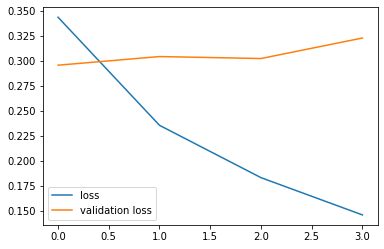

In [74]:
plt.plot(history.history["loss"],label = "loss")
plt.plot(history.history["val_loss"],label = "validation loss")
plt.legend()
plt.show()

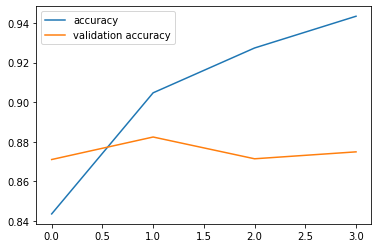

In [75]:
plt.plot(history.history["accuracy"],label = "accuracy")
plt.plot(history.history["val_accuracy"],label = "validation accuracy")
plt.legend()
plt.show()

In [0]:
#Clearing all the sessions in the background
tf.keras.backend.clear_session()
#Loading the model
m_load = tf.keras.models.load_model("/tmp/final_model.hdf5",compile = False)

Now when we will deploy the model the main thing is that we will letting the model to give output on a single text so for that text we need to convert the text into the format that the model can understand(we need to preprocess the input text similary we preprocesses our input train data before training for better result)

In [0]:
#Padding with zeros
def pad_to_size(text_vector,size):
  zeros = [0]*(size-len(text_vector))
  text_vector.extend(zeros)
  return text_vector

In [0]:
#Now we will create a function in which we will pass the text and function output will be the prediction
def predict_fun(text):
  #Encoding the text with numbers
  encoded_text = encoder.encode(text)
  #Padding the text to a fixed size using pad_to_size function
  encoded_padded_text = pad_to_size(encoded_text,32)
  #Casting the encoded_padded_text to int32
  encoded_padded_text = tf.cast(encoded_padded_text,tf.float32)
  predictions = m_load.predict(tf.expand_dims(encoded_padded_text,0))
  return predictions

In [79]:
text = ("amazing product loved it and will love recommending it to my friends")
prediction = predict_fun(text)
print(prediction)

[[5.423719]]


In [80]:
text = ("awful really i dont like the product")
prediction = predict_fun(text)
print(prediction)

[[-5.7440753]]


FRom above we can see that our model is generalising preety good 

Printing the distribution strategy used

In [81]:
print(tf.distribute.get_strategy())

It is using default distribution strategy as we haven't used any distribution strategy

In [0]:
%reload_ext tensorboard

In [83]:
%tensorboard --logdir /tmp/logs

<IPython.core.display.Javascript object>

Now we see the characterstics of model from tensorboard